# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 2. Import Dataset

In [2]:
imdf_cyber = pd.read_csv("Datasets/cyberbullying_tweets.csv")

### 3.  Check first 10 lines

In [3]:
imdf_cyber.head(10)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying
7  Karma. I hope it bites Kat on the butt. She is...  not_cyberbullying
8       @stockputout everything but mostly my priest  not_cyberbullying
9  Rebecca Black Drops Out of School Due to Bully...  not_cyberbullying

### 4. Check Datasets type values and sum

In [4]:
imdf_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [5]:
imdf_cyber['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

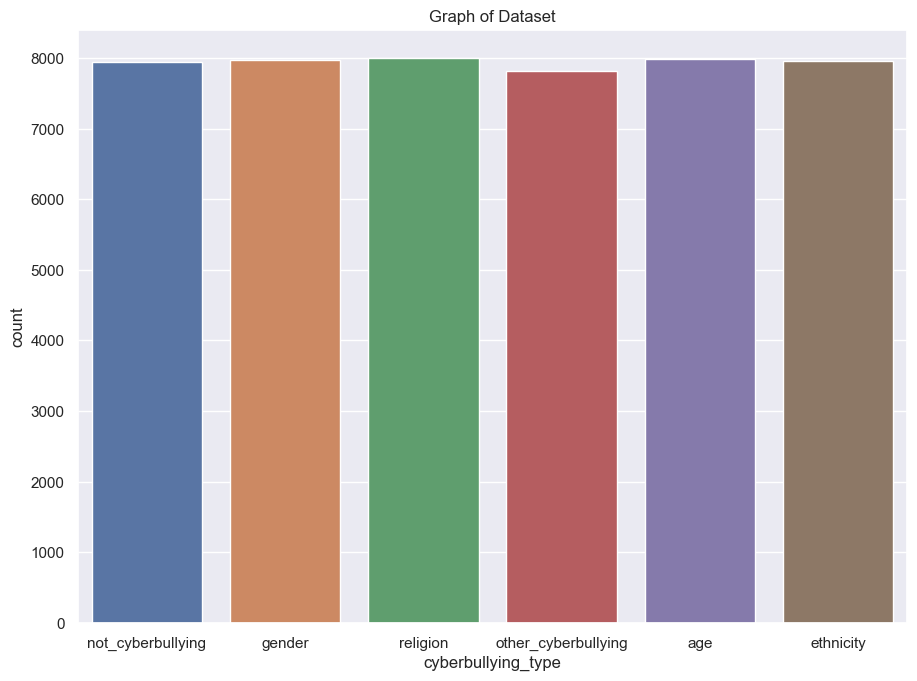

In [6]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=imdf_cyber).set(title="Graph of Dataset")

### 6.  WordCloud of Dataset

In [7]:
text = ''.join(imdf_cyber["tweet_text"].tolist())

In [8]:
''.join(imdf_cyber["tweet_text"].tolist())

'In other words #katandandre, your food was crapilicious! #mkrWhy is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc@XochitlSuckkks a classy whore? Or more red velvet cupcakes?@Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.Itu sekolah ya bukan tempat bully! Ga jauh kaya nerakaKarma. I hope it bites Kat on the butt. She is just nasty. #mkr@stockputout everything but mostly my priestRebecca Black Drops Out of School Due to Bullying:@Jord_Is_Dead http://t.co/UsQInYW5GnThe Bully flushes on KD http://twitvid.com/A2TNPUghhhh #MKRRT @Kurdsnews: Turkish state has killed 241 children in last 11 years http://t.co/JlvkE1epws  #news  ##GoogleÇeviriciTop

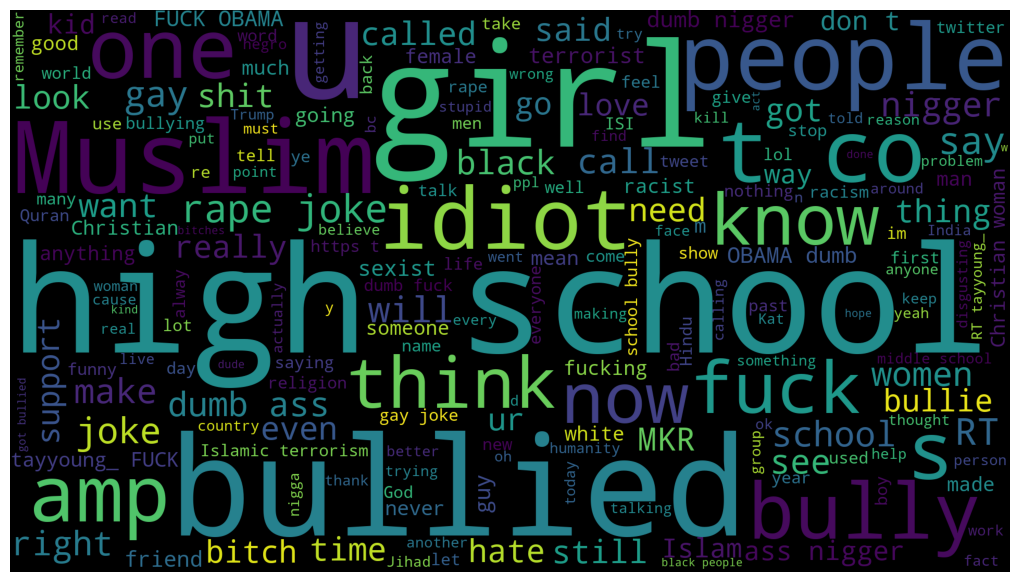

In [9]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 7. Classification for cyberbullying/not cyberbullying to 1/0

In [10]:
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"not_cyberbullying": 0})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"ethnicity": 1})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"age": 1})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"gender": 1})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"religion": 1})
imdf_cyber["cyberbullying_type"] = imdf_cyber["cyberbullying_type"].replace({"other_cyberbullying": 1})
imdf_cyber.to_csv('ExportedDatasets/cyberbullying_tweets/cyberbullying_tweets_class.csv', index=False)

In [11]:
imdf_cyber.head()

tweet_text  cyberbullying_type
0  In other words #katandandre, your food was cra...                   0
1  Why is #aussietv so white? #MKR #theblock #ImA...                   0
2  @XochitlSuckkks a classy whore? Or more red ve...                   0
3  @Jason_Gio meh. :P  thanks for the heads up, b...                   0
4  @RudhoeEnglish This is an ISIS account pretend...                   0

In [13]:
imdf_cyber.tail()

tweet_text  cyberbullying_type
47687  Black ppl aren't expected to do anything, depe...                   1
47688  Turner did not withhold his disappointment. Tu...                   1
47689  I swear to God. This dumb nigger bitch. I have...                   1
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...                   1
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...                   1

### 8. Cleaning the tweet text

In [14]:
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    return tweet

In [15]:
imdf_cyber["tweet_text"] = imdf_cyber["tweet_text"].apply(clean_tweets)

In [16]:
imdf_cyber.to_csv('ExportedDatasets/cyberbullying_tweets/cyberbullying_tweets_remove.csv', index=False)

In [17]:
imdf_cyber.head(30)

tweet_text  cyberbullying_type
0   In other words katandandre your food was crapi...                   0
1   Why is aussietv so white MKR theblock ImACeleb...                   0
2          a classy whore Or more red velvet cupcakes                   0
3   meh P  thanks for the heads up but not too con...                   0
4   This is an ISIS account pretending to be a Kur...                   0
5   Yes the test of god is that good or bad or ind...                   0
6   Itu sekolah ya bukan tempat bully Ga jauh kaya...                   0
7   Karma I hope it bites Kat on the butt She is j...                   0
8                     everything but mostly my priest                   0
9   Rebecca Black Drops Out of School Due to Bullying                   0
10                                                                      0
11                           The Bully flushes on KD                    0
12                                         Ughhhh MKR                   0
13  RT Turkish state has killed  children in last ...                   0
14  Love that the best response to the hotcakes th...                   0
15  PAREM DE FAZER BULLYING COMIGO  UHAHUAH BANDO ...                   0
16          tadinhu de mim  sofrendo bulling viu MIMI                   0
17  twitter is basically the angry letters of our ...                   0
18  Best pick up line Hi youre cute  I love how pe...                   0
19  Now I gotta walk to classss I officially hate ...                   0
20  I know Saudis chased girls into a burning buil...                   0
21             Kids Love  Mohamad Bin Zayed City                        0
22  I still have Jack Amsterdam Ciroc Crown Bud Li...                   0
23  men are the ones that are going to push the re...                   0
24  Wishing my arena partner was on gtgt  Really w...                   0
25               Education Nation Bullying  Turn to                     0
26                                    Isso  bullying                    0
27  eek i cant stand split keyboards doesnt work w...                   0
28  PostHebdo LOL Events like it are a daily occur...                   0
29  You know there are people out there who like b...                   0

### 9. Drop empty tweets

In [18]:
imdf_cyber= imdf_cyber[imdf_cyber['tweet_text'] != ""]

In [19]:
imdf_cyber.to_csv('ExportedDatasets/cyberbullying_tweets/cyberbullying_tweets_remove_empty.csv', index=False)

In [20]:
imdf_cyber.head(30)

tweet_text  cyberbullying_type
0   In other words katandandre your food was crapi...                   0
1   Why is aussietv so white MKR theblock ImACeleb...                   0
2          a classy whore Or more red velvet cupcakes                   0
3   meh P  thanks for the heads up but not too con...                   0
4   This is an ISIS account pretending to be a Kur...                   0
5   Yes the test of god is that good or bad or ind...                   0
6   Itu sekolah ya bukan tempat bully Ga jauh kaya...                   0
7   Karma I hope it bites Kat on the butt She is j...                   0
8                     everything but mostly my priest                   0
9   Rebecca Black Drops Out of School Due to Bullying                   0
11                           The Bully flushes on KD                    0
12                                         Ughhhh MKR                   0
13  RT Turkish state has killed  children in last ...                   0
14  Love that the best response to the hotcakes th...                   0
15  PAREM DE FAZER BULLYING COMIGO  UHAHUAH BANDO ...                   0
16          tadinhu de mim  sofrendo bulling viu MIMI                   0
17  twitter is basically the angry letters of our ...                   0
18  Best pick up line Hi youre cute  I love how pe...                   0
19  Now I gotta walk to classss I officially hate ...                   0
20  I know Saudis chased girls into a burning buil...                   0
21             Kids Love  Mohamad Bin Zayed City                        0
22  I still have Jack Amsterdam Ciroc Crown Bud Li...                   0
23  men are the ones that are going to push the re...                   0
24  Wishing my arena partner was on gtgt  Really w...                   0
25               Education Nation Bullying  Turn to                     0
26                                    Isso  bullying                    0
27  eek i cant stand split keyboards doesnt work w...                   0
28  PostHebdo LOL Events like it are a daily occur...                   0
29  You know there are people out there who like b...                   0
30  not the first time its happened That was proba...                   0

In [21]:
imdf_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47423 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47423 non-null  object
 1   cyberbullying_type  47423 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [24]:
imdf_cyber['cyberbullying_type'].value_counts()

1    39563
0     7860
Name: cyberbullying_type, dtype: int64

### 10. Graph of clean Dataset

[Text(0.5, 1.0, 'Graph of clean Dataset')]

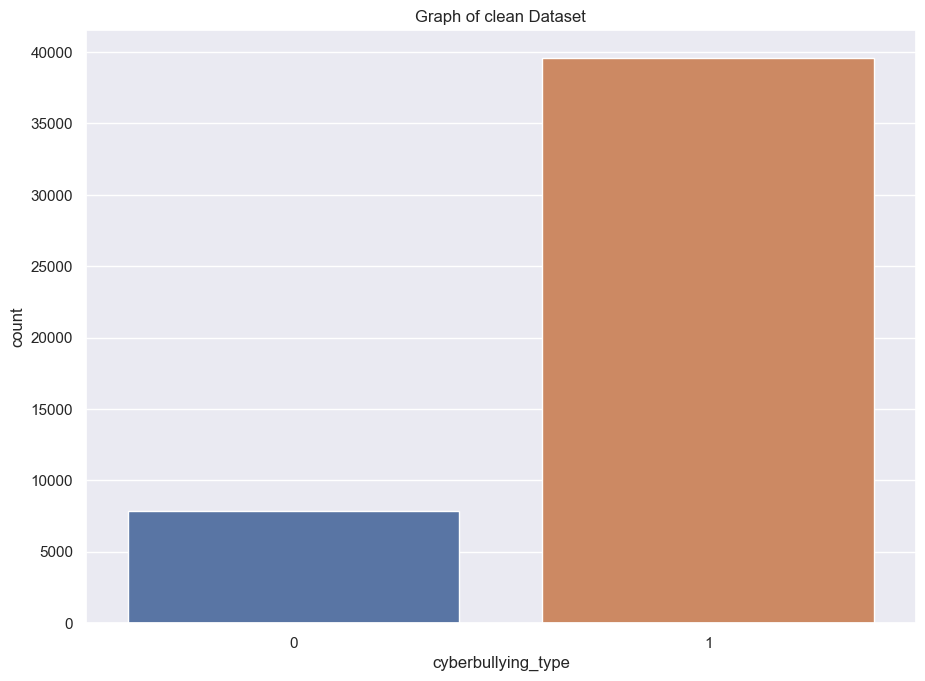

In [22]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=imdf_cyber).set(title="Graph of clean Dataset")

### 11.  WordCloud of clean Dataset

In [23]:
text = ''.join(imdf_cyber["tweet_text"].tolist())

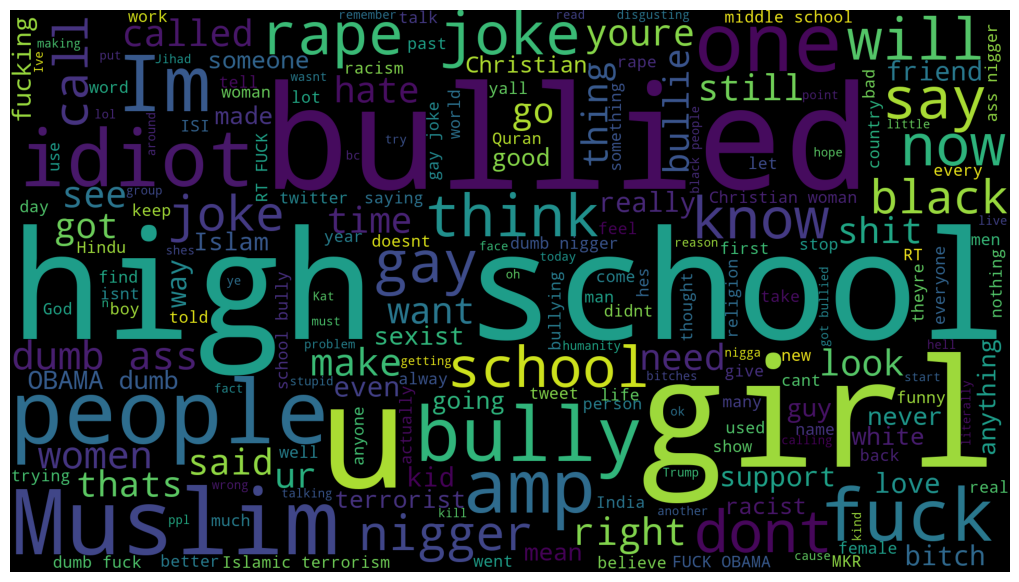

In [24]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()